# Career Match Recommendation System

This notebook demonstrates the career-focused content recommendation system that combines:
- **Content-Based Filtering**: Using embeddings to find similar content
- **Collaborative Filtering**: SVD-based matrix factorization
- **Career Alignment**: Matching content to career goals and skill gaps


In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from career_match_recommender import CareerMatchRecommender

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Initialize and Train the Recommender

In [2]:
# Initialize recommender with custom weights
recommender = CareerMatchRecommender(
    data_path="../database/",
    n_factors=50,
    alpha_content=0.3,   # Weight for content-based filtering
    alpha_collab=0.3,    # Weight for collaborative filtering
    alpha_career=0.4     # Weight for career alignment (highest priority)
)

# Train the model
recommender.fit()

Career Match Recommender - Training Pipeline
Loading data...
Loaded 200 users, 500 content items, 4497 interactions
Processing content embeddings...
Content embeddings shape: (500, 384)
Building user-item interaction matrix...
User-item matrix shape: (200, 500)
Sparsity: 0.9626
Training collaborative filtering model...
SVD factors: (200, 50), (500, 50)
Building career-skill mapping...
Training complete!
SVD factors: (200, 50), (500, 50)
Building career-skill mapping...
Training complete!


## 2. Explore User Profiles

In [3]:
# Load user data
users_df = pd.read_csv('../database/users.csv')
print(f"Total users: {len(users_df)}")
print(f"\nCareer goals distribution:")
print(users_df['goal'].value_counts())

Total users: 200

Career goals distribution:
goal
Chemical Engineer        27
Civil Engineer           27
Cybersecurity Analyst    23
Researcher               23
AI Engineer              22
Entrepreneur             19
Software Engineer        16
Data Scientist           16
Doctor                   14
Mechanical Engineer      13
Name: count, dtype: int64


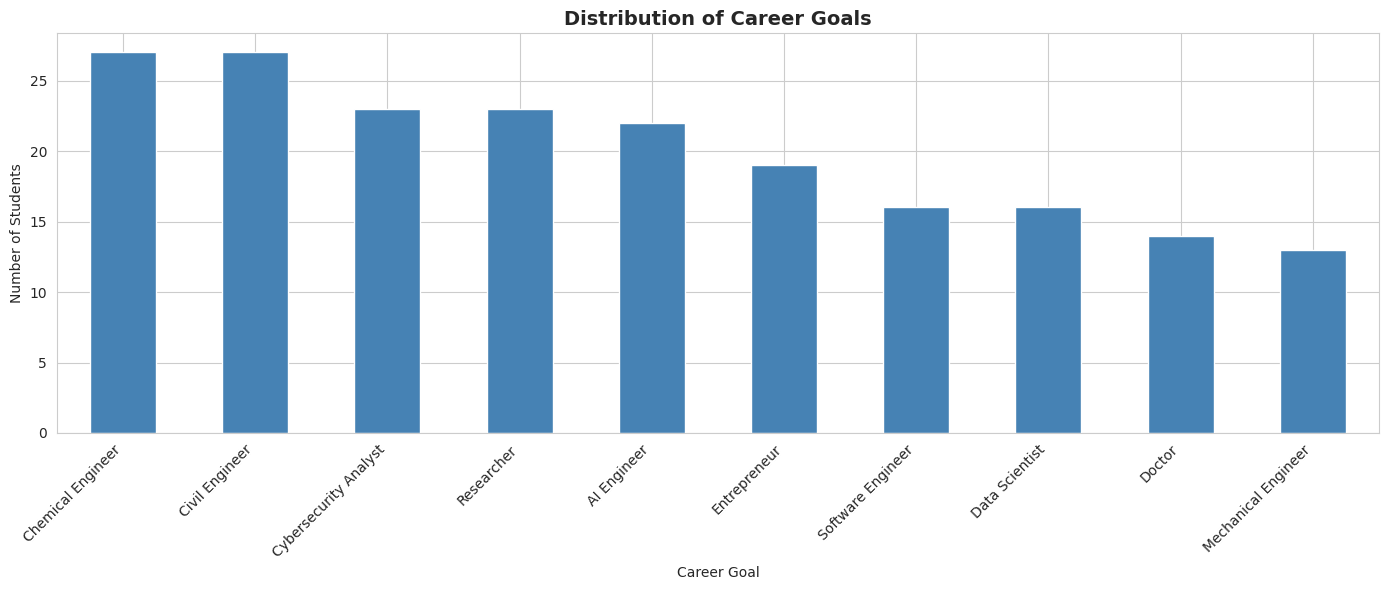

In [4]:
# Visualize career goal distribution
plt.figure(figsize=(14, 6))
users_df['goal'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribution of Career Goals', fontsize=14, fontweight='bold')
plt.xlabel('Career Goal')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Generate Recommendations for Specific Users

In [5]:
# Select a user to analyze
user_id = 'user_1'

# Get user profile
profile = recommender.get_user_profile(user_id)
print(f"User Profile: {user_id}")
print(f"  Career Goal: {profile['goal']}")
print(f"  Grade: {profile['grade']}")
print(f"  Preferences: {profile['preferences']}")
print(f"\n  Skill Mastery:")
for skill, mastery in sorted(profile['skills'].items(), key=lambda x: x[1], reverse=True):
    print(f"    {skill}: {mastery:.3f}")

User Profile: user_1
  Career Goal: Researcher
  Grade: 11th
  Preferences: ['Coding', 'Mathematics']

  Skill Mastery:
    Communication: 0.737
    Biology: 0.678
    Mathematics: 0.675
    Chemistry: 0.647
    Physics: 0.479
    Aptitude: 0.365
    Programming: 0.265


In [6]:
# Generate recommendations
recommendations = recommender.recommend_for_career(user_id, n_recommendations=10)

print(f"\nTop 10 Career-Aligned Recommendations for {user_id}:")
print("=" * 100)

for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. {rec['title']}")
    print(f"   Type: {rec['type']} | Difficulty: {rec['difficulty']} | Skills: {rec['skills']}")
    print(f"   Career Alignment: {rec['career_score']:.3f} | "
          f"Content Similarity: {rec['content_score']:.3f} | "
          f"Collaborative: {rec['collab_score']:.3f}")
    print(f"   ⭐ Final Score: {rec['final_score']:.3f}")


Top 10 Career-Aligned Recommendations for user_1:

1. Communication - writing Level 1
   Type: exercise | Difficulty: 1 | Skills: ['writing']
   Career Alignment: 0.268 | Content Similarity: 0.857 | Collaborative: 0.155
   ⭐ Final Score: 0.411

2. Physics - mechanics Level 1
   Type: article | Difficulty: 1 | Skills: ['mechanics']
   Career Alignment: 0.268 | Content Similarity: 0.861 | Collaborative: 0.144
   ⭐ Final Score: 0.409

3. Communication - writing Level 1
   Type: video | Difficulty: 1 | Skills: ['writing']
   Career Alignment: 0.268 | Content Similarity: 0.857 | Collaborative: 0.141
   ⭐ Final Score: 0.407

4. Communication - listening Level 1
   Type: video | Difficulty: 1 | Skills: ['listening']
   Career Alignment: 0.268 | Content Similarity: 0.876 | Collaborative: 0.107
   ⭐ Final Score: 0.402

5. Programming - web_dev Level 2
   Type: video | Difficulty: 2 | Skills: ['web_dev']
   Career Alignment: 0.282 | Content Similarity: 0.830 | Collaborative: 0.120
   ⭐ Final Sc

## 4. Visualize Recommendation Scores

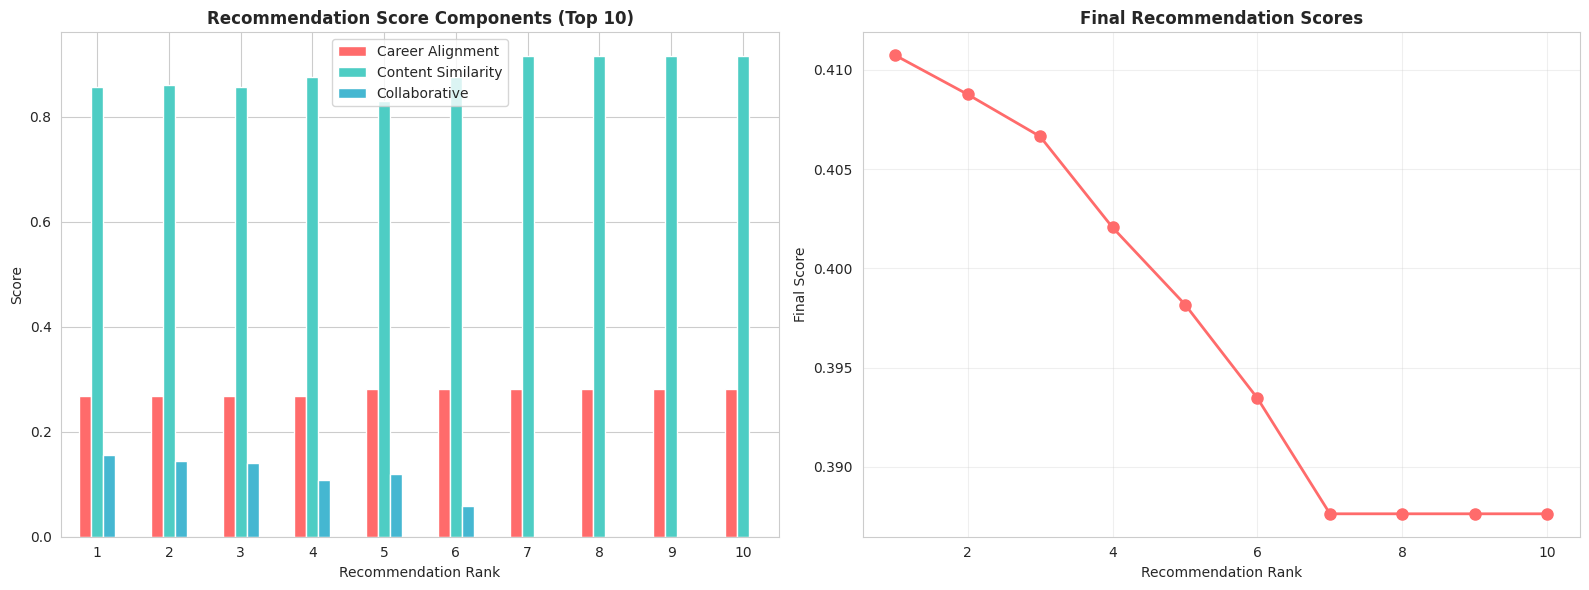

In [7]:
# Create DataFrame from recommendations
rec_df = pd.DataFrame(recommendations)

# Plot score components
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Score breakdown
score_data = rec_df[['career_score', 'content_score', 'collab_score']].head(10)
score_data.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Recommendation Score Components (Top 10)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Recommendation Rank')
axes[0].set_ylabel('Score')
axes[0].legend(['Career Alignment', 'Content Similarity', 'Collaborative'], loc='best')
axes[0].set_xticklabels(range(1, 11), rotation=0)

# Final scores
axes[1].plot(range(1, len(rec_df) + 1), rec_df['final_score'], marker='o', linewidth=2, markersize=8, color='#FF6B6B')
axes[1].set_title('Final Recommendation Scores', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Recommendation Rank')
axes[1].set_ylabel('Final Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Compare Different Career Goals

In [8]:
# Select users with different career goals
career_samples = {
    'Software Engineer': 'user_2',
    'Doctor': 'user_3',
    'AI Engineer': 'user_4',
    'Data Scientist': 'user_13',
    'Researcher': 'user_10'
}

comparison_results = {}

for career, uid in career_samples.items():
    recs = recommender.recommend_for_career(uid, n_recommendations=5)
    comparison_results[career] = recs
    
    print(f"\n{'='*80}")
    print(f"Career Goal: {career} (User: {uid})")
    print('='*80)
    
    for i, rec in enumerate(recs, 1):
        print(f"{i}. {rec['title']} | Difficulty: {rec['difficulty']} | Score: {rec['final_score']:.3f}")


Career Goal: Software Engineer (User: user_2)
1. Programming - web_dev Level 3 | Difficulty: 3 | Score: 0.408
2. Physics - mechanics Level 1 | Difficulty: 1 | Score: 0.408
3. Aptitude - verbal Level 3 | Difficulty: 3 | Score: 0.405
4. Physics - mechanics Level 1 | Difficulty: 1 | Score: 0.400
5. Communication - speaking Level 3 | Difficulty: 3 | Score: 0.398

Career Goal: Doctor (User: user_3)
1. Communication - writing Level 1 | Difficulty: 1 | Score: 0.430
2. Communication - speaking Level 2 | Difficulty: 2 | Score: 0.420
3. Communication - speaking Level 1 | Difficulty: 1 | Score: 0.406
4. Communication - writing Level 1 | Difficulty: 1 | Score: 0.399
5. Aptitude - numerical Level 1 | Difficulty: 1 | Score: 0.390

Career Goal: Doctor (User: user_3)
1. Communication - writing Level 1 | Difficulty: 1 | Score: 0.430
2. Communication - speaking Level 2 | Difficulty: 2 | Score: 0.420
3. Communication - speaking Level 1 | Difficulty: 1 | Score: 0.406
4. Communication - writing Level 1 | 

## 6. Analyze Skill Gaps and Content Alignment

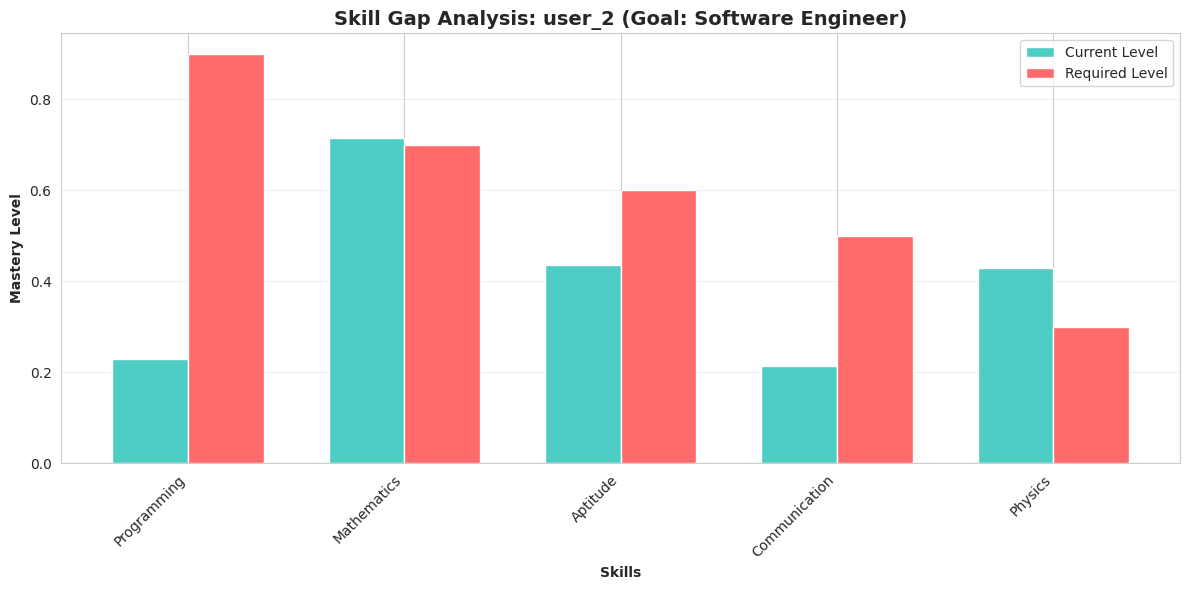


Skill Gaps for user_2 (Career: Software Engineer):
Programming          | Current: 0.230 | Required: 0.900 | Gap: 0.670
Communication        | Current: 0.213 | Required: 0.500 | Gap: 0.287
Aptitude             | Current: 0.436 | Required: 0.600 | Gap: 0.164
Mathematics          | Current: 0.715 | Required: 0.700 | Gap: 0.000
Physics              | Current: 0.430 | Required: 0.300 | Gap: 0.000


In [10]:
# Analyze skill gaps for a user
user_id = 'user_2'
profile = recommender.get_user_profile(user_id)
career_goal = profile['goal']
user_skills = profile['skills']

# Get required skills for career
if career_goal in recommender.career_skill_mapping:
    required_skills = recommender.career_skill_mapping[career_goal]
    
    # Compute skill gaps
    skill_gaps = {}
    for skill, required in required_skills.items():
        current = user_skills.get(skill, 0.0)
        gap = max(0, required - current)
        skill_gaps[skill] = {
            'current': current,
            'required': required,
            'gap': gap
        }
    
    # Visualize skill gaps
    skills = list(skill_gaps.keys())
    current_levels = [skill_gaps[s]['current'] for s in skills]
    required_levels = [skill_gaps[s]['required'] for s in skills]
    
    x = np.arange(len(skills))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, current_levels, width, label='Current Level', color='#4ECDC4')
    bars2 = ax.bar(x + width/2, required_levels, width, label='Required Level', color='#FF6B6B')
    
    ax.set_xlabel('Skills', fontweight='bold')
    ax.set_ylabel('Mastery Level', fontweight='bold')
    ax.set_title(f'Skill Gap Analysis: {user_id} (Goal: {career_goal})', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(skills, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print gap details
    print(f"\nSkill Gaps for {user_id} (Career: {career_goal}):")
    print("=" * 60)
    for skill in sorted(skill_gaps.keys(), key=lambda s: skill_gaps[s]['gap'], reverse=True):
        gap_info = skill_gaps[skill]
        print(f"{skill:20s} | Current: {gap_info['current']:.3f} | "
              f"Required: {gap_info['required']:.3f} | Gap: {gap_info['gap']:.3f}")

## 7. Batch Recommendations for Multiple Users

In [11]:
# Generate recommendations for multiple users
user_list = ['user_1', 'user_2', 'user_3', 'user_4', 'user_5']
batch_results = recommender.batch_recommend(user_list, n_recommendations=5)

# Analyze batch results
for user_id, recs in batch_results.items():
    profile = recommender.get_user_profile(user_id)
    avg_score = np.mean([r['final_score'] for r in recs])
    avg_career_alignment = np.mean([r['career_score'] for r in recs])
    
    print(f"{user_id} ({profile['goal']}):")
    print(f"  Avg Final Score: {avg_score:.3f} | Avg Career Alignment: {avg_career_alignment:.3f}")
    print(f"  Top Recommendation: {recs[0]['title']} (Score: {recs[0]['final_score']:.3f})")
    print()

user_1 (Researcher):
  Avg Final Score: 0.405 | Avg Career Alignment: 0.271
  Top Recommendation: Communication - writing Level 1 (Score: 0.411)

user_2 (Software Engineer):
  Avg Final Score: 0.404 | Avg Career Alignment: 0.243
  Top Recommendation: Programming - web_dev Level 3 (Score: 0.408)

user_3 (Doctor):
  Avg Final Score: 0.409 | Avg Career Alignment: 0.285
  Top Recommendation: Communication - writing Level 1 (Score: 0.430)

user_4 (AI Engineer):
  Avg Final Score: 0.410 | Avg Career Alignment: 0.272
  Top Recommendation: Communication - listening Level 1 (Score: 0.432)

user_5 (Chemical Engineer):
  Avg Final Score: 0.420 | Avg Career Alignment: 0.254
  Top Recommendation: Programming - python Level 1 (Score: 0.456)



## 8. Evaluate Recommendation Quality

In [12]:
# Evaluate recommendations for a user
user_id = 'user_1'
recs = recommender.recommend_for_career(user_id, n_recommendations=10)
metrics = recommender.evaluate_recommendations(user_id, recs)

print(f"Evaluation Metrics for {user_id}:")
print("=" * 60)
print(f"Career Goal: {metrics['career_goal']}")
print(f"\nAverage Scores:")
print(f"  Career Alignment: {metrics['avg_career_alignment']:.3f}")
print(f"  Content Similarity: {metrics['avg_content_similarity']:.3f}")
print(f"  Collaborative Score: {metrics['avg_collab_score']:.3f}")
print(f"  Final Score: {metrics['avg_final_score']:.3f}")
print(f"\nDiversity: {metrics['diversity']:.3f}")
print(f"\nDifficulty Distribution:")
for level, count in metrics['difficulty_distribution'].items():
    print(f"  {level}: {count}")

Evaluation Metrics for user_1:
Career Goal: Researcher

Average Scores:
  Career Alignment: 0.276
  Content Similarity: 0.882
  Collaborative Score: 0.073
  Final Score: 0.397

Diversity: 0.300

Difficulty Distribution:
  level_1: 4
  level_2: 6
  level_3: 0


## 9. Test Different Weight Configurations

Career Match Recommender - Training Pipeline
Loading data...
Loaded 200 users, 500 content items, 4497 interactions
Processing content embeddings...
Content embeddings shape: (500, 384)
Building user-item interaction matrix...
User-item matrix shape: (200, 500)
Sparsity: 0.9626
Training collaborative filtering model...
SVD factors: (200, 50), (500, 50)
Building career-skill mapping...
Training complete!
SVD factors: (200, 50), (500, 50)
Building career-skill mapping...
Training complete!
Career Match Recommender - Training Pipeline
Loading data...
Loaded 200 users, 500 content items, 4497 interactions
Processing content embeddings...
Content embeddings shape: (500, 384)
Building user-item interaction matrix...
User-item matrix shape: (200, 500)
Sparsity: 0.9626
Training collaborative filtering model...
Career Match Recommender - Training Pipeline
Loading data...
Loaded 200 users, 500 content items, 4497 interactions
Processing content embeddings...
Content embeddings shape: (500, 384)


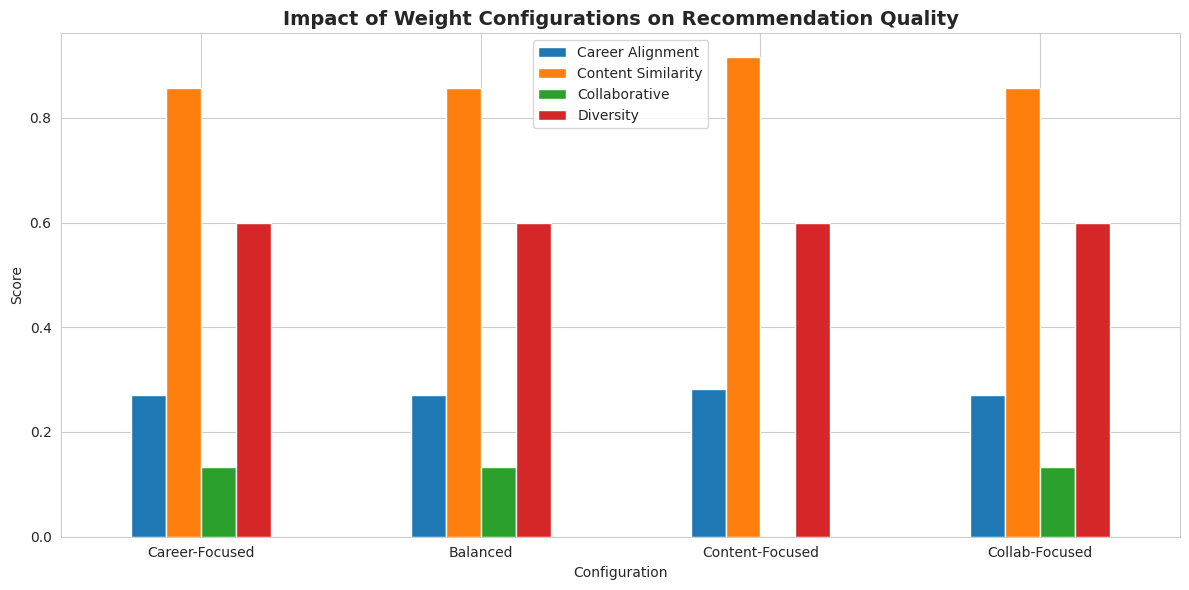

In [13]:
# Test different weight configurations
weight_configs = [
    {'name': 'Career-Focused', 'alpha_content': 0.2, 'alpha_collab': 0.2, 'alpha_career': 0.6},
    {'name': 'Balanced', 'alpha_content': 0.33, 'alpha_collab': 0.33, 'alpha_career': 0.34},
    {'name': 'Content-Focused', 'alpha_content': 0.6, 'alpha_collab': 0.2, 'alpha_career': 0.2},
    {'name': 'Collab-Focused', 'alpha_content': 0.2, 'alpha_collab': 0.6, 'alpha_career': 0.2},
]

user_id = 'user_1'
comparison = []

for config in weight_configs:
    # Create recommender with specific weights
    temp_recommender = CareerMatchRecommender(
        data_path="../database/",
        n_factors=50,
        alpha_content=config['alpha_content'],
        alpha_collab=config['alpha_collab'],
        alpha_career=config['alpha_career']
    )
    temp_recommender.fit()
    
    # Generate recommendations
    recs = temp_recommender.recommend_for_career(user_id, n_recommendations=5)
    metrics = temp_recommender.evaluate_recommendations(user_id, recs)
    
    comparison.append({
        'config': config['name'],
        'avg_career': metrics['avg_career_alignment'],
        'avg_content': metrics['avg_content_similarity'],
        'avg_collab': metrics['avg_collab_score'],
        'avg_final': metrics['avg_final_score'],
        'diversity': metrics['diversity']
    })

# Display comparison
comparison_df = pd.DataFrame(comparison)
print("\nWeight Configuration Comparison:")
print(comparison_df.to_string(index=False))

# Plot comparison
comparison_df.set_index('config')[['avg_career', 'avg_content', 'avg_collab', 'diversity']].plot(
    kind='bar', figsize=(12, 6), rot=0
)
plt.title('Impact of Weight Configurations on Recommendation Quality', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Configuration')
plt.legend(['Career Alignment', 'Content Similarity', 'Collaborative', 'Diversity'])
plt.tight_layout()
plt.show()

## 10. Export Recommendations

In [15]:
# Generate and export recommendations for all users
all_users = recommender.users['id'].unique()[:10]  # Sample 10 users
all_recommendations = recommender.batch_recommend(all_users, n_recommendations=5)

# Prepare export data
export_data = []
for user_id, recs in all_recommendations.items():
    profile = recommender.get_user_profile(user_id)
    for rank, rec in enumerate(recs, 1):
        export_data.append({
            'user_id': user_id,
            'career_goal': profile['goal'],
            'rank': rank,
            'item_id': rec['item_id'],
            'title': rec['title'],
            'type': rec['type'],
            'difficulty': rec['difficulty'],
            'skills': rec['skills'],
            'career_score': rec['career_score'],
            'content_score': rec['content_score'],
            'collab_score': rec['collab_score'],
            'final_score': rec['final_score']
        })

export_df = pd.DataFrame(export_data)
export_df.to_csv('../database/career_recommendations_output.csv', index=False)
print(f"✅ Exported {len(export_df)} recommendations to 'career_recommendations_output.csv'")
print(f"\nSample:")
print(export_df.head(10))

✅ Exported 50 recommendations to 'career_recommendations_output.csv'

Sample:
  user_id        career_goal  rank     item_id  \
0  user_1         Researcher     1  content_33   
1  user_1         Researcher     2  content_55   
2  user_1         Researcher     3  content_15   
3  user_1         Researcher     4  content_35   
4  user_1         Researcher     5  content_23   
5  user_2  Software Engineer     1  content_59   
6  user_2  Software Engineer     2  content_17   
7  user_2  Software Engineer     3   content_6   
8  user_2  Software Engineer     4  content_55   
9  user_2  Software Engineer     5  content_14   

                               title      type  difficulty         skills  \
0    Communication - writing Level 1  exercise           1    ['writing']   
1        Physics - mechanics Level 1   article           1  ['mechanics']   
2    Communication - writing Level 1     video           1    ['writing']   
3  Communication - listening Level 1     video           1  ['l